# Covid 19 Data Analysis

## Notebook imports

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Constant

In [30]:
FILE = pd.read_csv('Covid19_Dataset.csv')

In [31]:
FILE

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,100896618
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,128500364
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,658019
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,290492
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,40100376
5,Chandigarh,92293,67,91061,1165,0.07,98.67,1.26,79502477
6,Chhattisgarh,1152370,36,1138300,14034,0.00,98.78,1.22,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11441,0,11437,4,0.00,99.97,0.03,231502578
8,Delhi,1903189,2138,1874851,26200,0.11,98.51,1.38,773997
9,Goa,245646,89,241725,3832,0.04,98.40,1.56,3772103


## Checking for Missing Data

In [32]:
FILE.isnull().any()

State/UTs          False
Total Cases        False
Active             False
Discharged         False
Deaths             False
Active Ratio       False
Discharge Ratio    False
Death Ratio        False
Population         False
dtype: bool

In [33]:
FILE = FILE.rename(columns = {'State/UTs' : 'State', 'Total Cases':'Total_Cases', 'Active Ratio':'Active_Ratio',
                             'Discharge Ratio':'Discharge_Ratio', 'Death Ratio':'Death_Ratio'})
FILE.style.background_gradient(cmap="Blues")

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.000000,98.720000,1.280000,100896618
1,Andhra Pradesh,2319869,62,2305076,14731,0.000000,99.360000,0.630000,128500364
2,Arunachal Pradesh,64504,1,64207,296,0.000000,99.540000,0.460000,658019
3,Assam,724225,4,716235,7986,0.000000,98.900000,1.100000,290492
4,Bihar,830702,43,818403,12256,0.010000,98.520000,1.480000,40100376
5,Chandigarh,92293,67,91061,1165,0.070000,98.670000,1.260000,79502477
6,Chhattisgarh,1152370,36,1138300,14034,0.000000,98.780000,1.220000,28900667
7,Dadra and Nagar Haveli and Daman and Diu,11441,0,11437,4,0.000000,99.970000,0.030000,231502578
8,Delhi,1903189,2138,1874851,26200,0.110000,98.510000,1.380000,773997
9,Goa,245646,89,241725,3832,0.040000,98.400000,1.560000,3772103


In [34]:
FILE.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,100896618
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,128500364
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,658019
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,290492
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,40100376


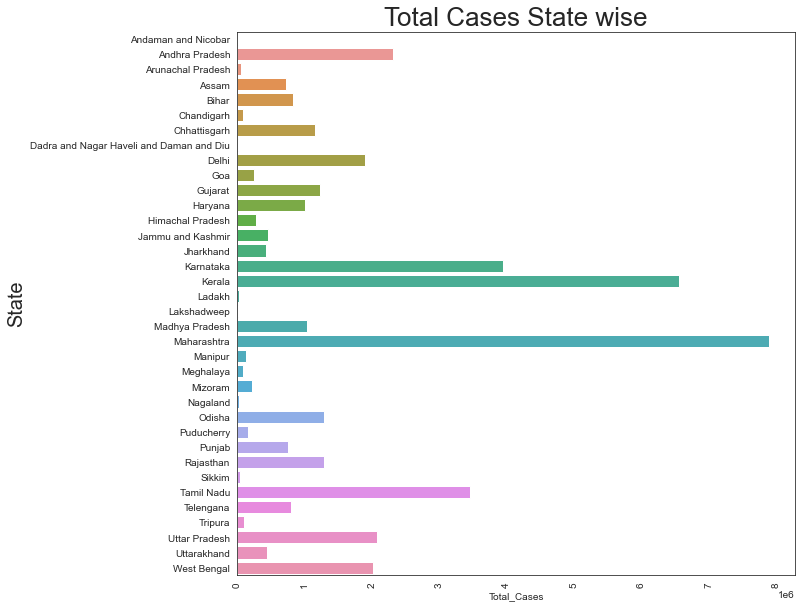

In [35]:
plt.figure(figsize=[10,10])
plt.ylabel('TOTAL CASES--->',fontsize=20)
plt.title('Total Cases State wise', fontsize=26)
sns.barplot(y = FILE['State'], x = FILE['Total_Cases'])
plt.xticks(rotation=90)
plt.show()

In [36]:
FILE.describe()

,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.198233e+06,415.416667,1.183250e+06,14567.027778,0.026389,98.845000,1.128056,3.971861e+07
std,1.771219e+06,797.343424,1.745163e+06,26960.635812,0.033050,0.494221,0.491440,5.050913e+07
min,1.003900e+04,0.000000,9.910000e+03,4.000000,0.000000,97.650000,0.030000,6.600100e+04
25%,9.912050e+04,4.000000,9.802975e+04,1104.500000,0.000000,98.520000,0.870000,1.695473e+06
50%,5.892080e+05,69.000000,5.828095e+05,6505.500000,0.010000,98.860000,1.100000,2.410088e+07
75%,1.285924e+06,385.250000,1.276082e+06,14208.250000,0.040000,99.112500,1.397500,6.979986e+07
max,7.882476e+06,3799.000000,7.732792e+06,147856.000000,0.120000,99.970000,2.340000,2.315026e+08


In [37]:
FILE.corr()

,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Population
Total_Cases,1.000000,0.793212,0.999987,0.943813,0.164050,-0.135375,0.125179,-0.066280
Active,0.793212,1.000000,0.794030,0.684131,0.535411,-0.121842,0.086232,-0.059700
Discharged,0.999987,0.794030,1.000000,0.942144,0.164359,-0.133217,0.122980,-0.065410
Deaths,0.943813,0.684131,0.942144,1.000000,0.122715,-0.266886,0.260741,-0.118593
Active_Ratio,0.164050,0.535411,0.164359,0.122715,1.000000,-0.147545,0.079946,-0.092319
Discharge_Ratio,-0.135375,-0.121842,-0.133217,-0.266886,-0.147545,1.000000,-0.997654,0.210190
Death_Ratio,0.125179,0.086232,0.122980,0.260741,0.079946,-0.997654,1.000000,-0.205110
Population,-0.066280,-0.059700,-0.065410,-0.118593,-0.092319,0.210190,-0.205110,1.000000


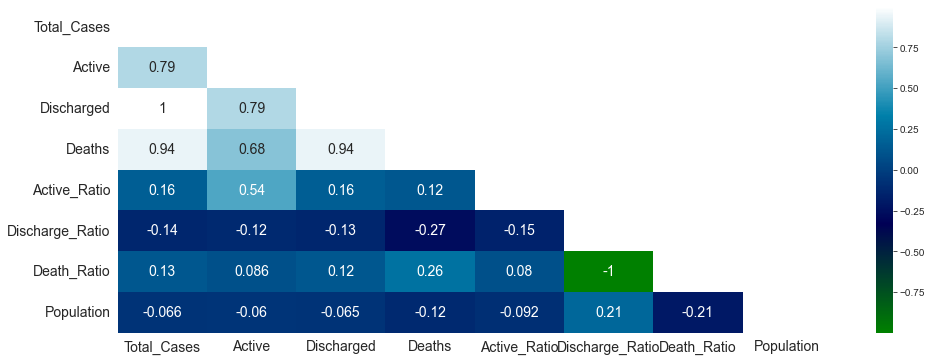

In [38]:
mask = np.zeros_like(FILE.corr())
traingle_indices = np.triu_indices_from(mask)
mask[traingle_indices] = True
plt.figure(figsize=(16,6))
sns.heatmap(FILE.corr(),mask = mask,annot = True, annot_kws={"size":14},cmap = 'ocean')
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Find Top 10 States Having Highest Total cases

In [39]:
data = FILE[['State','Total_Cases']]
Highest_Total_Cases = data.sort_values(by='Total_Cases', ascending=False).head(10)

In [40]:
pd.DataFrame(Highest_Total_Cases).reset_index(drop=True)

,State,Total_Cases
0,Maharashtra,7882476
1,Kerala,6550042
2,Karnataka,3950378
3,Tamil Nadu,3454847
4,Andhra Pradesh,2319869
5,Uttar Pradesh,2078519
6,West Bengal,2019058
7,Delhi,1903189
8,Odisha,1288357
9,Rajasthan,1285113


## Visualize Top 10 States Having Highest Total Cases

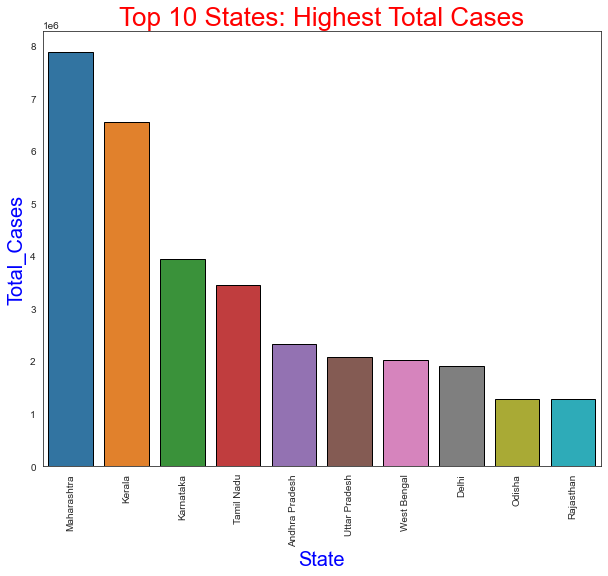

In [41]:
plt.figure(figsize=[10,8])
plt.xlabel('STATE--->',fontsize=20, color="Blue")
plt.ylabel('TOTAL CASES--->',fontsize=20, color="Blue")
plt.title('Top 10 States: Highest Total Cases', fontsize=26, color="Red")
sns.barplot(x = Highest_Total_Cases['State'], y = Highest_Total_Cases['Total_Cases'],edgecolor="black")
plt.xticks(rotation=90)
plt.show()

## Pie chart of Active Cases and Death

In [42]:
AC = FILE['Active'].mean()
DT = FILE['Deaths'].mean()

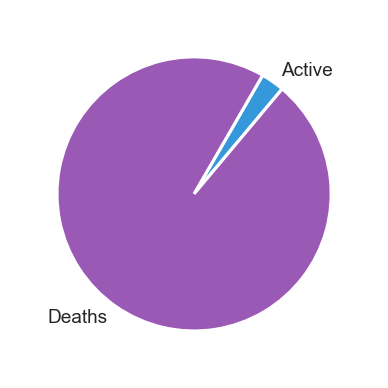

In [43]:
category_names = ['Active', 'Deaths']
# sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#3498db', '#9b59b6', '#fd79a8', '#fab1a0','#3498db', '#9b59b6', '#fd79a8']
sizes = [AC,DT]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels = category_names, textprops={'fontsize':6},startangle = 50,colors = custom_colors)


plt.show()

In [44]:
FILE.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Population
0,Andaman and Nicobar,10039,0,9910,129,0.00,98.72,1.28,100896618
1,Andhra Pradesh,2319869,62,2305076,14731,0.00,99.36,0.63,128500364
2,Arunachal Pradesh,64504,1,64207,296,0.00,99.54,0.46,658019
3,Assam,724225,4,716235,7986,0.00,98.90,1.10,290492
4,Bihar,830702,43,818403,12256,0.01,98.52,1.48,40100376


In [45]:
cases = ["Total_Cases","Active","Discharged"]
x = FILE[cases]
y = FILE.Deaths

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [47]:
rg = RandomForestRegressor(max_leaf_nodes=5,max_depth=5,random_state=0)

In [48]:
print(x_train.shape, y_train.shape)

(28, 3) (28,)


In [49]:
print(x_train)
print(y_train)

    Total_Cases  Active  Discharged
11      1000711    1247      988843
29        39165       4       38709
27       760180     126      742303
35      2019058     378     1997477
33      2078519     874     2054127
28      1285113     478     1275081
32       100887       0       99964
8       1903189    2138     1874851
13       454191      55      449384
5         92293      67       91061
17        28260       4       28028
14       435309      22      429969
7         11441       0       11437
26       165832      21      163849
1       2319869      62     2305076
12       285003      71      280796
25      1288357     148     1279083
24        35495       0       34735
6       1152370      36     1138300
23       228126     138      227290
4        830702      43      818403
18        11402       0       11350
21       137230       0      135110
19      1042167     262     1031170
9        245646      89      241725
34       437789     477      429619
3        724225       4     

In [50]:
rg.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5, random_state=0)

In [54]:
prediction = rg.predict(x_train)
prediction

array([13268.80779978,   830.89563668, 12788.51140693, 20150.01228571,
       21968.96402381, 11729.07906169,   830.89563668, 23070.19259524,
        5910.63649495,   916.87805427,   830.89563668,  5455.15775469,
         830.89563668,   862.66863668, 17914.34790476,  4258.40582393,
       11486.63939502,   830.89563668, 12309.96695851,  1993.58233294,
       12338.55974423,   830.89563668,   862.66863668, 11167.46122835,
        3558.46752076,  5892.76586003,  9694.92271248,   830.89563668])

In [60]:
print('Accuracy of prediction: ', np.sqrt(mean_squared_error(prediction, y_train)))

Accuracy of prediction:  1721.607007564537
